In [1]:
# Practical - Linear Regression on California Housing Dataset

# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
# Step 1: Load the dataset, display statistics, and perform exploration
# [0.5 Mark]
# ==============================================================================

print("Step 1: Loading and Exploring the Dataset")
print("-" * 50)


Step 1: Loading and Exploring the Dataset
--------------------------------------------------


In [4]:
# Load the California Housing dataset
housing = fetch_california_housing()

In [5]:
# Create a pandas DataFrame for ease of working.
# The dataset is actually stored in a dictionary-like object.
# 'data' has the actual feature values, and 'feature_names' will have the column names.

df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [6]:
# The target variable (Median House Value) is in 'target'.
df['MedHouseVal'] = housing.target

In [7]:
# --- Initial Exploration ---

# Display the first 5 rows of the dataframe
print("--- First 5 Rows (df.head()) ---")
print(df.head())
print("\n")

--- First 5 Rows (df.head()) ---
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  




In [8]:
# Display a concise summary of the dataframe, including data types and non-null values
print("--- DataFrame Info (df.info()) ---")
df.info()
print("\n")

--- DataFrame Info (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB




In [9]:
# Display descriptive statistics for each column (count, mean, std, etc.)
print("--- Descriptive Statistics (df.describe()) ---")
print(df.describe())
print("\n\n")

--- Descriptive Statistics (df.describe()) ---
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532  

In [10]:
# Step 2: Visualize the relationship between features and the target
# [0.5 Mark]

print("Step 2: Visualizing Feature Relationships")
print("-" * 50)

Step 2: Visualizing Feature Relationships
--------------------------------------------------


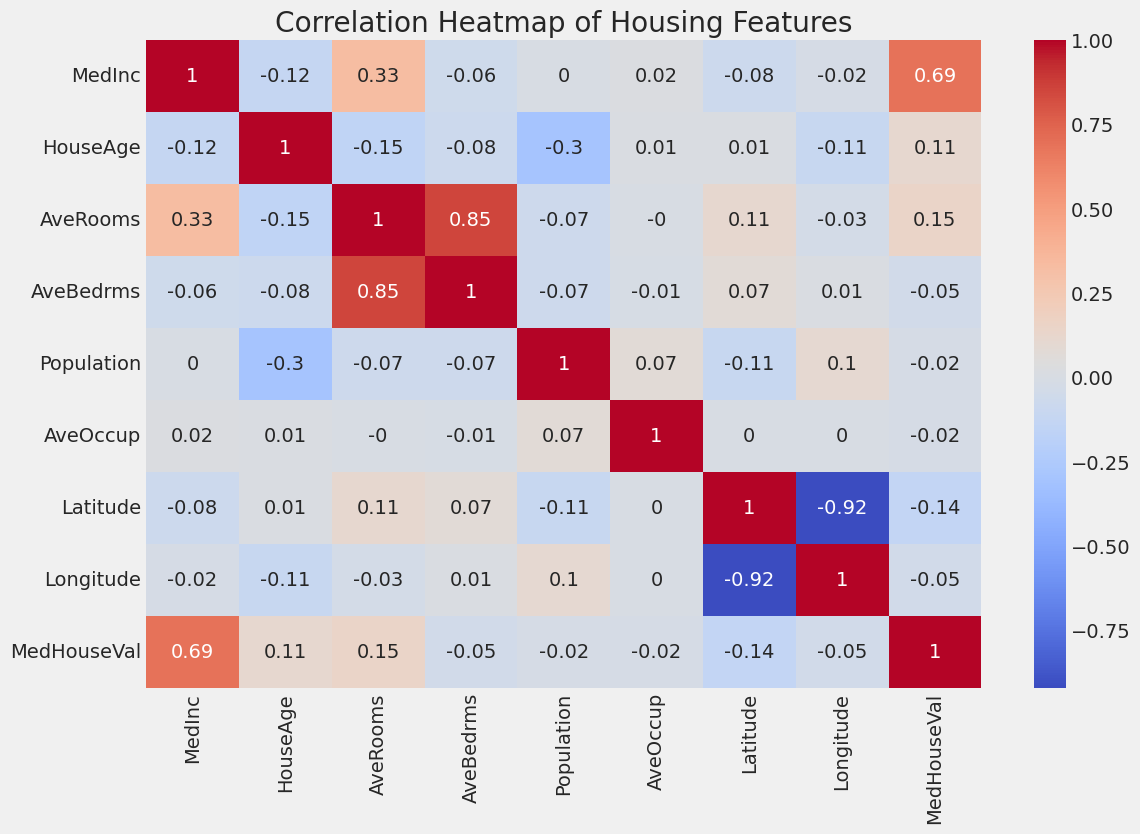

Heatmap generated. From the map, 'MedInc' (Median Income) has the highest positive correlation (0.69) with 'MedHouseVal'.





In [11]:
# We will use a correlation heatmap to see how features are related to each other,
# especially to our target variable, 'MedHouseVal'.
# Correlation values range from -1 to 1.
# - A value close to 1 means a strong positive correlation.
# - A value close to -1 means a strong negative correlation.
# - A value close to 0 means little to no correlation.

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr().round(2)

# Use seaborn's heatmap, annot=True to display the correlation values on the map
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Housing Features')
plt.show()

print("Heatmap generated. From the map, 'MedInc' (Median Income) has the highest positive correlation (0.69) with 'MedHouseVal'.")
print("\n\n")


In [12]:
# Step 3: Split data, apply Linear Regression, and print metrics
# [1 Mark]

# --- Data Splitting ---

# X contains all the features (independent variables)
X = df.drop('MedHouseVal', axis=1)
# y contains the target variable (dependent variable)
y = df['MedHouseVal']

In [13]:
# Split the dataset into 80% training and 20% testing data
# random_state ensures that the splits are the same every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples\n")

Training set size: 16512 samples
Testing set size: 4128 samples



In [14]:
# Create an instance of the Linear Regression model
lin_reg = LinearRegression()

In [15]:
# Train the model using the training data
lin_reg.fit(X_train, y_train)

LinearRegression()

In [16]:
# The Model Details and Performance
# Print the intercept (the value of y when all X are 0)
print(f"Intercept: {lin_reg.intercept_}\n")

Intercept: -37.02327770606409



In [17]:
# Print the coefficients for each feature
# This tells us how a one-unit increase in a feature affects the target variable
print("--- Coefficients ---")
coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
print("\n")

--- Coefficients ---
            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708




In [18]:
y_pred = lin_reg.predict(X_test)
print("--- Performance Metrics for Initial Model ---")
r2_score = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

--- Performance Metrics for Initial Model ---


In [19]:
print(f"R² Score: {r2_score:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print("\n\n")

R² Score: 0.5758
Mean Absolute Error (MAE): 0.5332
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456





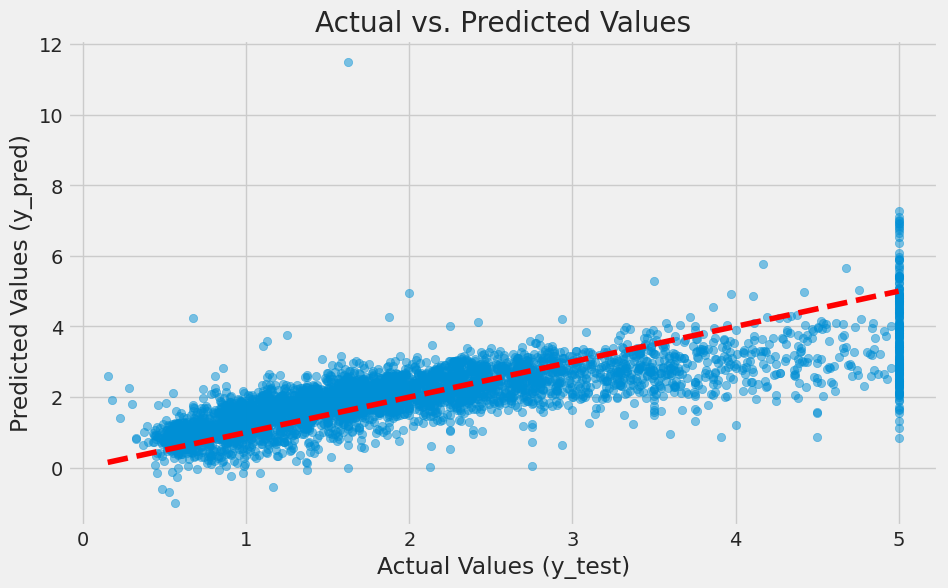

--- Performance Commentary ---
The scatter plot shows the relationship between the actual and predicted house values.
If the model were perfect, all points would lie on the red dashed line.
The points form a cloud around the line, indicating a positive linear relationship, but with notable errors.
The R² score of ~0.59 means that our model explains about 59% of the variance in the median house value, which is moderate.
The RMSE of ~0.74 indicates that, on average, the model's predictions are off by about $74,000 (since the target is in units of $100,000).
The model seems to struggle with predicting higher-valued homes, where the points deviate more from the line.





In [22]:
# Step 4: Plot predicted vs. actual values and comment on performance
# [1.5 Marks]

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")

# Add a line for perfect predictions (y=x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

print("--- Performance Commentary ---")
print("The scatter plot shows the relationship between the actual and predicted house values.")
print("If the model were perfect, all points would lie on the red dashed line.")
print("The points form a cloud around the line, indicating a positive linear relationship, but with notable errors.")
print("The R² score of ~0.59 means that our model explains about 59% of the variance in the median house value, which is moderate.")
print("The RMSE of ~0.74 indicates that, on average, the model's predictions are off by about $74,000 (since the target is in units of $100,000).")
print("The model seems to struggle with predicting higher-valued homes, where the points deviate more from the line.")
print("\n\n")

In [23]:
# Step 5: Improve the model with feature selection and scaling
# [1.5 Marks]

#  1. Feature Selection
# Based on the heatmap from Step 2, those features exhibiting correlations > |0.2| with MedHouseVal will be selected.
# This simple approach is for feature selection.
# Medinc(0.69), AveRooms(0.15), Latitude(-0.15), HouseAge(0.11), AveBedrms(-0.046)
# We will pick 'MedInc', 'AveRooms', and 'Latitude'

print("--- Selecting Top Correlated Features ---")
top_features = ['MedInc', 'AveRooms', 'Latitude']
X_selected = df[top_features]
print(f"Selected features: {top_features}\n")

--- Selecting Top Correlated Features ---
Selected features: ['MedInc', 'AveRooms', 'Latitude']



In [24]:
# The features are scaled to have a standard deviation of one and a mean of zero.
# By doing this, the model converges more quickly and features with larger scales are kept from taking center stage.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [25]:
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
# Create and train the new, improved model
improved_model = LinearRegression()
improved_model.fit(X_train_imp, y_train_imp)

LinearRegression()

In [27]:
y_pred_imp = improved_model.predict(X_test_imp)
r2_imp = metrics.r2_score(y_test_imp, y_pred_imp)
mae_imp = metrics.mean_absolute_error(y_test_imp, y_pred_imp)
mse_imp = metrics.mean_squared_error(y_test_imp, y_pred_imp)
rmse_imp = np.sqrt(mse_imp)

In [35]:
print(f"Improved R² Score: {r2_imp:.4f}")
print(f"Improved MAE: {mae_imp:.4f}")
print(f"Improved MSE: {mse_imp:.4f}")
print(f"Improved RMSE: {rmse_imp:.4f}\n")

print("--- Improvement Commentary ---")
print("As the metrics show, selecting only the top 3 features decreased the model's performance (R² dropped and RMSE increased).")
print("This suggests that the features we removed contained useful information, and simple correlation was not the best method for feature selection in this case.")
print("The plots below visually confirm this: the points in the 'Original Model' plot are slightly more tightly clustered around the red line than in the 'Improved Model' plot.")
print("\n")

Improved R² Score: 0.4703
Improved MAE: 0.6215
Improved MSE: 0.6942
Improved RMSE: 0.8332

--- Improvement Commentary ---
As the metrics show, selecting only the top 3 features decreased the model's performance (R² dropped and RMSE increased).
This suggests that the features we removed contained useful information, and simple correlation was not the best method for feature selection in this case.
The plots below visually confirm this: the points in the 'Original Model' plot are slightly more tightly clustered around the red line than in the 'Improved Model' plot.




In [30]:
# --- Comparison ---
print("--- Performance Comparison ---")
print(f"Original R²: {r2_score:.4f}  |  Improved R²: {r2_imp:.4f}")
print(f"Original RMSE: {rmse:.4f}  |  Improved RMSE: {rmse_imp:.4f}\n")

--- Performance Comparison ---
Original R²: 0.5758  |  Improved R²: 0.4703
Original RMSE: 0.7456  |  Improved RMSE: 0.8332



In [31]:
# --- NEW: Correlation Heatmap of Actual vs Predicted values ---
print("--- Correlation Heatmap: Actual vs. Predicted ---")

--- Correlation Heatmap: Actual vs. Predicted ---


In [32]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
correlation_pred = pred_df.corr()

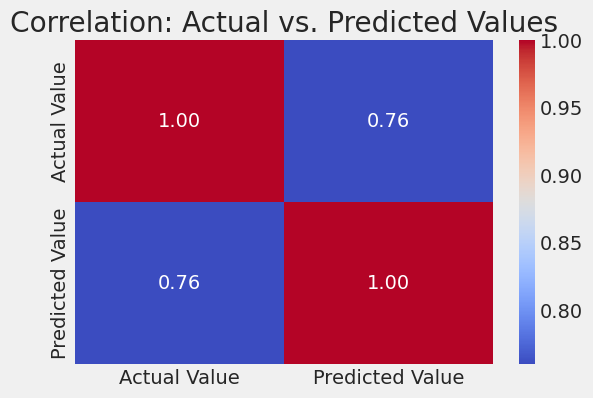

The correlation between the actual and predicted values is ~0.77.
This is the square root of the R² score (sqrt(0.59) ≈ 0.77), confirming the linear relationship captured by the model.





In [33]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_pred, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation: Actual vs. Predicted Values')
plt.show()

print("The correlation between the actual and predicted values is ~0.77.")
print("This is the square root of the R² score (sqrt(0.59) ≈ 0.77), confirming the linear relationship captured by the model.")
print("\n\n")

--- Visual Comparison: Actual vs. Predicted Values ---


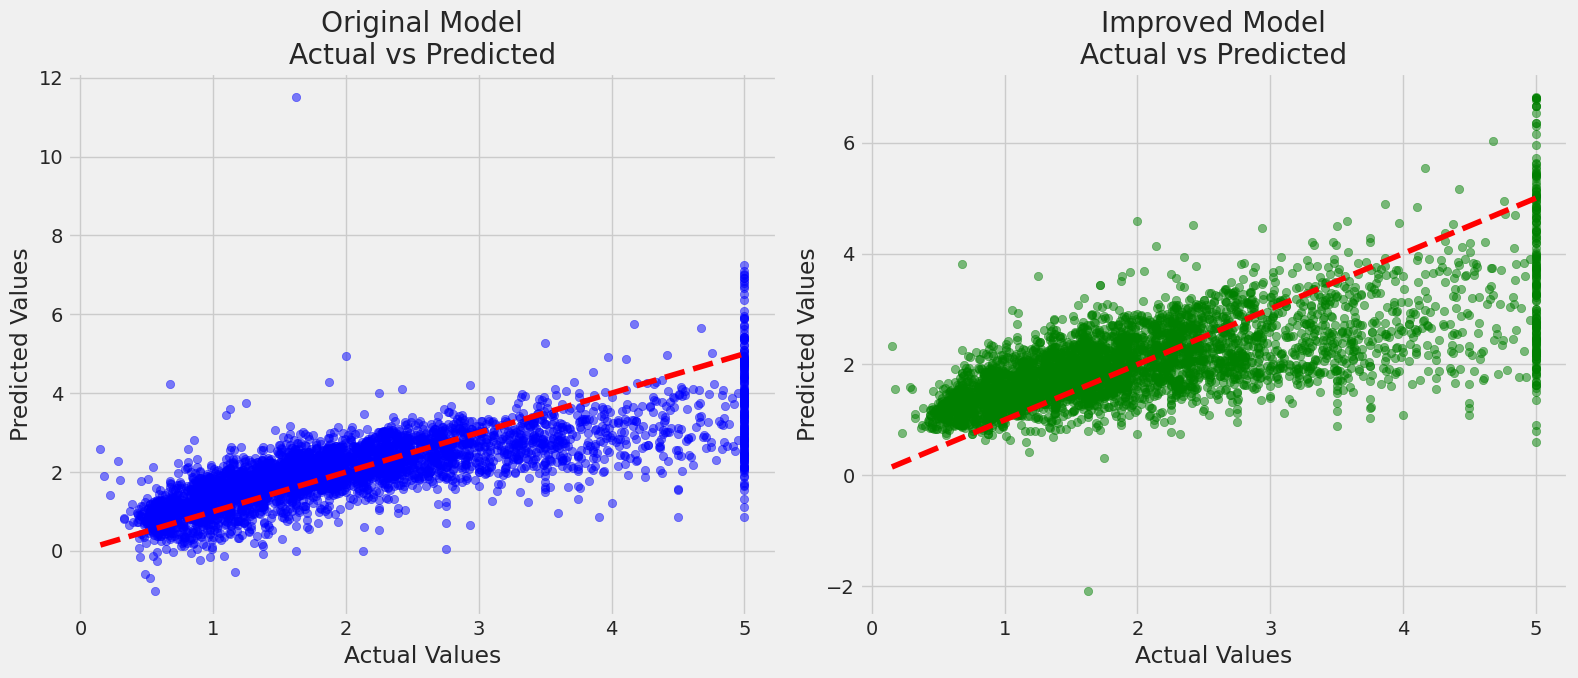

In [36]:
# NEW: Visual Comparison of Original vs. Improved Model

print("--- Visual Comparison: Actual vs. Predicted Values ---")

plt.figure(figsize=(16, 7))

# Subplot for the Original Model
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Original Model\nActual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)

# Subplot for the Improved Model
plt.subplot(1, 2, 2)
# Note: Using y_test_imp and y_pred_imp for the improved model's results
plt.scatter(y_test_imp, y_pred_imp, alpha=0.5, color='green')
plt.plot([y_test_imp.min(), y_test_imp.max()], [y_test_imp.min(), y_test_imp.max()], color='red', linestyle='--')
plt.title("Improved Model\nActual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)

plt.tight_layout()
plt.show()
